# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Kasyfil Aziz
- **Email:** mksyfla@gmail.com
- **ID Dicoding:** kasyfil


## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah pengguna Bike Sharing setiap bulan?
- Bagaimana perbedaan jumlah pengguna Bike Sharing setiap musim?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv("https://raw.githubusercontent.com/mksyfla/analisis-data/master/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [46]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["temp"] = day_df["temp"].mul(41)
day_df["hum"] = day_df["hum"].mul(100)

season_map = {1:"springer", 2:"summer", 3:"fall", 4:"winter"}

day_df["season"] = day_df["season"].map(season_map)
day_df["season"] = day_df["season"].astype('string')

In [47]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,14.110847,0.363625,80.5833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,14.902598,0.353739,69.6087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,8.050924,0.189405,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,8.200000,0.212122,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,9.305237,0.229270,43.6957,0.186900,82,1518,1600


In [49]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    string        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [50]:
day_df["yr_mnth"] = day_df["dteday"].dt.to_period("M")
monthly_sum = day_df.groupby("yr_mnth")["cnt"].sum().reset_index()
print(monthly_sum)

    yr_mnth     cnt
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


In [51]:
season_sum = day_df.groupby("season")["cnt"].sum()
print(season_sum)

season
fall        1061129
springer     471348
summer       918589
winter       841613
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan jumlah pengguna Bike Sharing setiap bulannya?

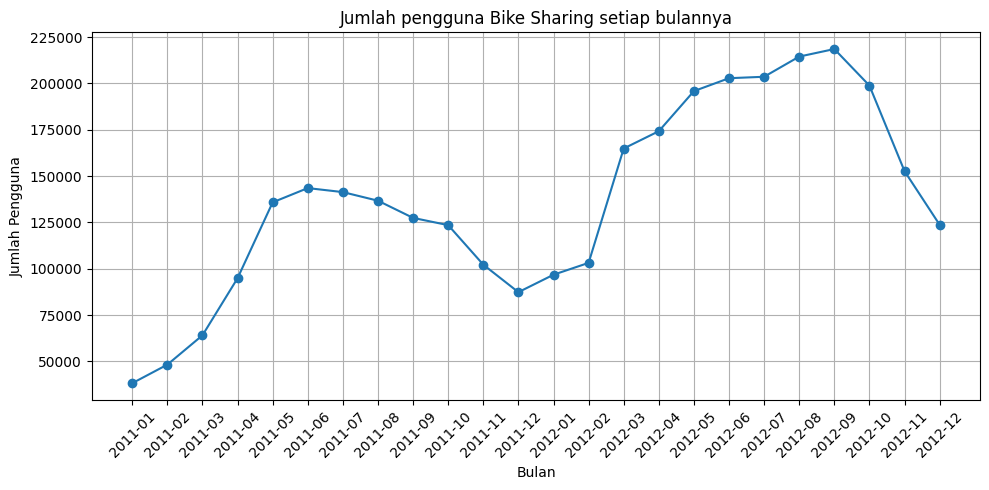

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_sum["yr_mnth"].astype(str), monthly_sum["cnt"], marker='o', linestyle='-')
ax.set_title("Jumlah pengguna Bike Sharing setiap bulannya")
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Pengguna')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2: - Bagaimana perbedaan jumlah pengguna Bike Sharing setiap musim??

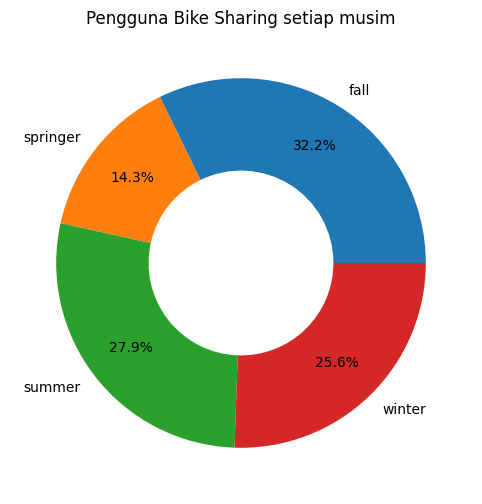

In [53]:
plt.figure(figsize=(12, 6))
plt.pie(season_sum, labels=season_sum.index, autopct='%1.1f%%', pctdistance=0.75, wedgeprops={'width': 0.5})
plt.title('Pengguna Bike Sharing setiap musim')
plt.show()

## Conclusion

- Bagaimana perkembangan jumlah pengguna Bike Sharing setiap bulan?

  Pengguna Bike Sharing mengalami peningkatan yang positif setiap bulannya, namun mengalami penurunan pada bulan oktober sampai desember.


- Bagaimana perbedaan jumlah pengguna Bike Sharing setiap musim?
  
  Pengguna Bike Sharing paling banyak digunakan pada musim gugur, lalu musim panas, musim dingin, dan musim semi


In [54]:
season_sum.to_csv("season_sum.csv", index=False)
monthly_sum.to_csv("monthly_sum.csv", index=False)